In [78]:
import pandas as pd
import numpy as np
import json
import scipy.spatial.distance as ssd
import matplotlib.pyplot as plt


import ssl

ssl._create_default_https_context = ssl._create_stdlib_context
def compute_centroids(data_frame,k):
    centroids = []
    for centroid in range(k):
        data_cluster = data_frame[data_frame["cluster"]== centroid]
        avg_x = data_cluster['x'].mean()
        avg_y = data_cluster["y"].mean()

        centroids.append((avg_x,avg_y))

    return centroids




In [46]:
#kmeans clusting algorith
#1. choose k centroids at random
#2. assign each point to its closet controid(euclidean distance)
#3. re compute centroids to be average of each cluster


#repeat steps 2 and 3 until clusters are stable
#todays features:slimy, kill humans(1-10)
#friday preview: catchprhase, cluster based on text instead of numbers



In [47]:
df = pd.read_json("aliens.json")

df.head()

,results
0,"{'name': 'stitch', 'slimy': 1, 'kill humans': ..."
1,"{'name': 'E.T.', 'slimy': 2, 'kill humans': 1,..."
2,"{'name': 'Harvester', 'slimy': 9, 'kill humans..."
3,"{'name': 'kang', 'slimy': 10, 'kill humans': 8..."
4,"{'name': 'kodos', 'slimy': 10, 'kill humans': ..."


In [48]:
#normalize json data so we have one column per feature

df = pd.json_normalize(df["results"])
df.head()

,name,slimy,kill humans,catchphrase
0,stitch,1.0,2.0,ohana means family family means no one is left...
1,E.T.,2.0,1.0,E.T. phone home!
2,Harvester,9.0,10.0,I would like to conquer your planet
3,kang,10.0,8.0,Go ahead! Throw your vote away!
4,kodos,10.0,7.0,"Eat, Simpsons! Grow large with food!"


<Axes: xlabel='slimy', ylabel='kill humans'>

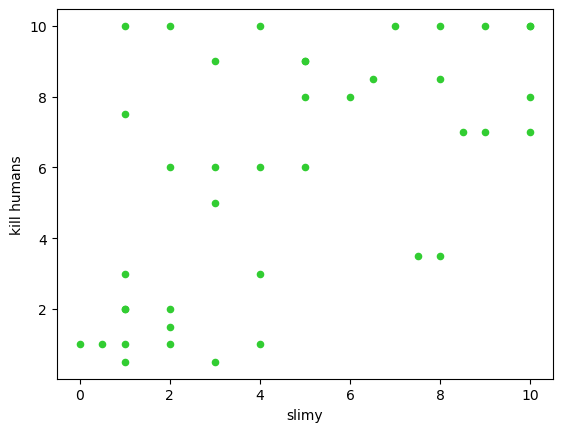

In [49]:
df.plot(kind = "scatter",x = "slimy",y="kill humans",color = "limegreen")

In [50]:
K = 2

centroids = df.sample(K)[["slimy", "kill humans"]],
centroids = [(df.iloc[i]["slimy"], df.iloc[i]["kill humans"]) for i in range(len(centroids))]
centroids

[(1.0, 2.0)]

In [73]:
#assign each point to its closest centroid

#centroid 0 = first random sample, centroid 1 = second random sample
def assign_centroids(df,centroids,x="slimy",y="kill humans"):  
    centroid_assignments = []
    for i in range(len(df)):
        min_distance = np.inf
        min_centroid = -1
        curr_point = df.iloc[i][[x,y]]
        for j in range(len(centroids)):
            curr_centroid = df.iloc[j][[x,y]]
            distance = ssd.euclidean(curr_point,curr_centroid)
            if distance < min_distance:
                min_distance = distance
                min_centroid = j
        centroid_assignments.append(min_centroid)

    return centroid_assignments

In [71]:
#make a cluster column in the dataframe
df["cluster"] = centroid_assignments

In [53]:
#plot our two clusters
#df["color"] = np.where(df["cluster"]==0,"magenta","green")
#df.plot(kind = "scatter",x = "slimy",y="kill humans", c = "color")

In [75]:
for i in range(10):
       centroids = compute_centroids(df, K)
       centroid_assignments = assign_centroids(df, centroids)
       df["cluster"] = centroid_assignments
       df["color"] = np.select([df["cluster"] == 0, df["cluster"] == 1, df["cluster"] == 2],
                           ["orange", "dodgerblue", "firebrick"])
       df.plot(kind = "scatter", x = "slimy", y = "kill humans", c = "color")
       plt.show()

KeyError: 'x'

In [ ]:
#today friday cluster,
#tf.idj on aliean catchpres
#apply it,
#apply PCA to deude dimensionality to 2
#do k means cluster algorith on the two pca dimensions

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

In [ ]:
vectorizer = TfidfVectorizer(stop_words = "english")
vecotrized_catchphrases = vectorizer.fit_transform(df["catchphrase"])
vecotrized_catchphrases

<40x121 sparse matrix of type '<class 'numpy.float64'>'
	with 137 stored elements in Compressed Sparse Row format>

In [ ]:
vect_df = pd.DataFrame(vecotrized_catchphrases.todense(),columns=vectorizer.get_feature_names_out())
vect_df.head()

,ahead,alien,argh,arrives,ass,attack,away,ball,balloon,banged,...,tomorrow,took,truth,vote,want,wants,wife,world,worry,yes
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.512419,0.0,0.0,0.0,0.0,0.0,0.46074,0.0,0.0,0.0,...,0.0,0.0,0.0,0.512419,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
#high dimensionality data, so add pca
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(vecotrized_catchphrases.toarray())

In [58]:
df[["pca1","pca2"]] = reduced_data
df.head()

,name,slimy,kill humans,catchphrase,cluster,pca1,pca2
0,stitch,1.0,2.0,ohana means family family means no one is left...,0,-0.004005,0.003895
1,E.T.,2.0,1.0,E.T. phone home!,1,-0.008690,0.008757
2,Harvester,9.0,10.0,I would like to conquer your planet,0,-0.005983,0.005906
3,kang,10.0,8.0,Go ahead! Throw your vote away!,1,-0.055602,-0.076684
4,kodos,10.0,7.0,"Eat, Simpsons! Grow large with food!",1,-0.004005,0.003895


In [70]:

centroids = df.sample(K)[["pca1", "pca2"]],
centroids = [(df.iloc[i]["pca1"], df.iloc[i]["pca2"]) for i in range(len(centroids))]
centroids

[(-0.004004996037528304, 0.003895353013523199)]

In [74]:
#assign every data point to its closest centroid
centroid_assignments = assign_centroids(df,centroids,x= "pca1",y="pca1")



<function matplotlib.pyplot.show(close=None, block=None)>

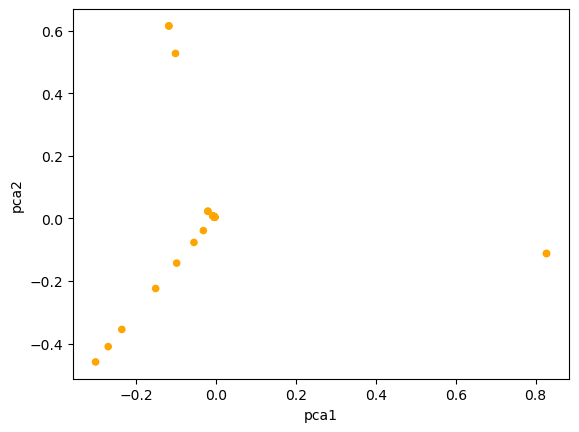

In [79]:
df["cluster"]= centroid_assignments
df["color"] = np.select([df["cluster"] == 0, df["cluster"] == 1, df["cluster"] == 2],
                           ["orange", "dodgerblue", "firebrick"])
df.plot(kind = "scatter", x = "pca1", y = "pca2", c = "color")
plt.show